# 523homework

# 1.	Imgファイルのdifferent_shapes.pngの好きな図形を長方形の枠で囲む

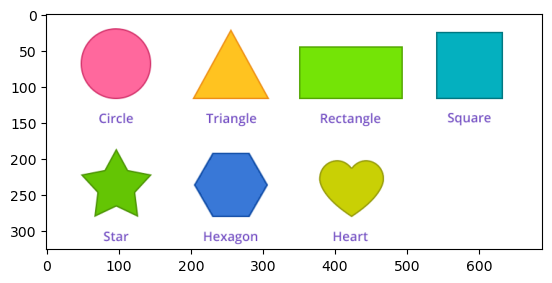

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread("C:\\Users\\smart25\\Desktop\\img\\img\\different_shapes.png")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)


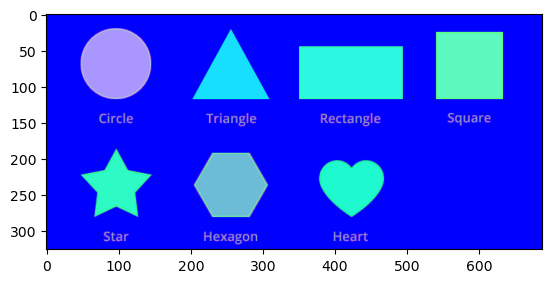

In [3]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(img_hsv)

In [19]:
img_hsv[50, 600]

array([ 92, 250, 191], dtype=uint8)

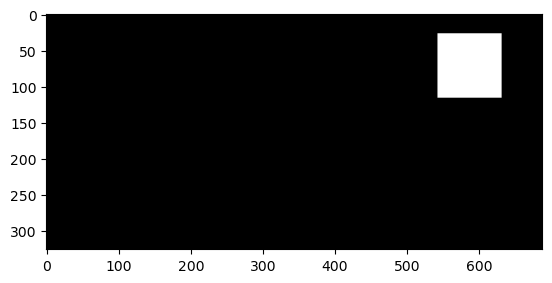

In [20]:
H = 5
S = 30
V = 50

upper = np.array([92+H, 250+S, 191+V])
lower = np.array([92-H, 250-S, 191-V])

img_range = cv2.inRange(img_hsv, lower, upper)
plt.imshow(img_range, "gray")


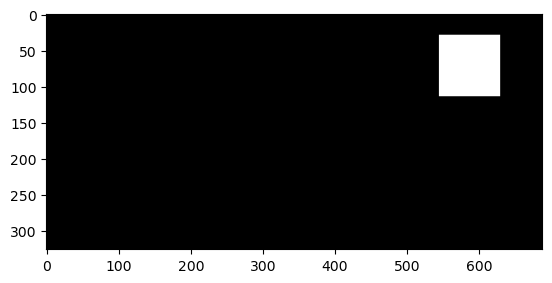

In [21]:
# 必要に応じてノイズ除去のために、収縮、膨張をする
kernel = np.ones((5,5),np.uint8)
img_erode = cv2.erode(img_range,kernel)
img_dilate = cv2.dilate(img_erode, kernel)
plt.imshow(img_erode, "gray")

In [9]:
contours, hierarchy = cv2.findContours(img_dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
# cv2.RETR_EXTERNAL --> 一番外側の輪郭のみを取得する
# cv2.CHAIN_APPROX_NONE--> 輪郭座標の省略なし

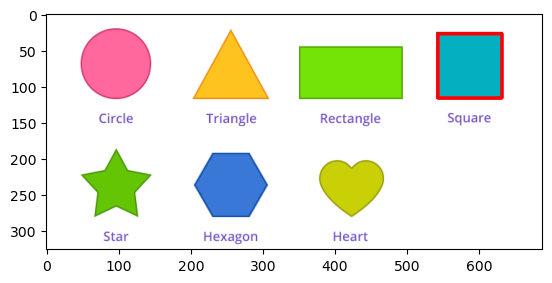

In [11]:

for each_contour in contours:
    # 輪郭に外接する長方形を取得する
    x, y, w, h = cv2.boundingRect(each_contour)
    # 長方形を描画する
    img1_rect = cv2.rectangle(img1_rgb, (x, y), (x+w, y+h), (255, 0, 0), 3)
plt.imshow(img1_rgb)

# 1.	Imgファイルのdifferent_shapes.pngの好きな図形を長方形の枠で囲む

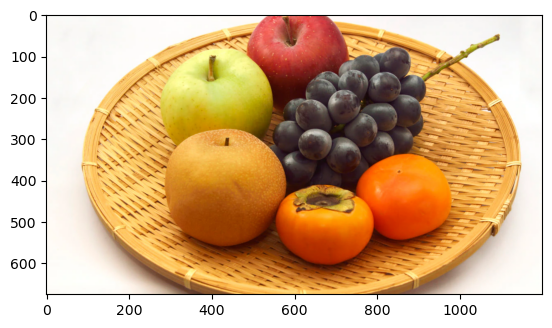

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img_fruit = cv2.imread("C:\\Users\\smart25\\Desktop\\img\\img\\pixta_5722208_M-1200x675.webp")
img_fruit_rgb = cv2.cvtColor(img_fruit, cv2.COLOR_BGR2RGB)
plt.imshow(img_fruit_rgb)


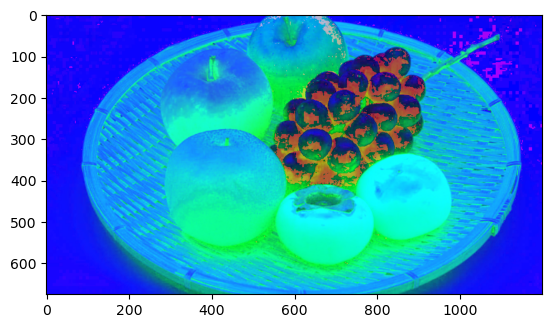

In [2]:
img_fruit_hsv = cv2.cvtColor(img_fruit, cv2.COLOR_BGR2HSV)
plt.imshow(img_fruit_hsv)

In [3]:
img_fruit_hsv[200, 400]

array([ 31, 110, 223], dtype=uint8)

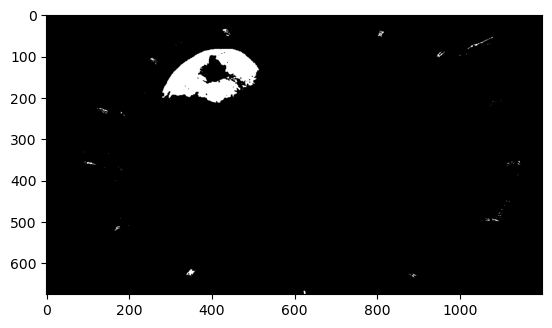

In [4]:
H = 5
S = 30
V = 50

upper = np.array([31+H, 110+S, 223+V])
lower = np.array([31-H, 110-S, 223-V])

img_fruit_range = cv2.inRange(img_fruit_hsv, lower, upper)
plt.imshow(img_fruit_range, "gray")

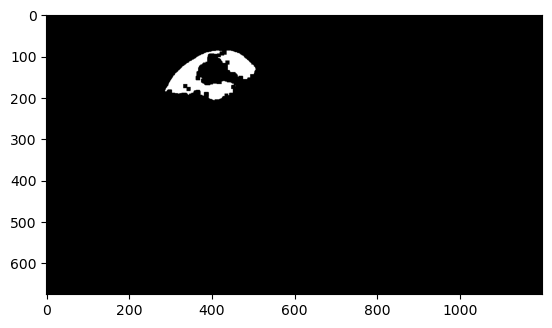

In [9]:
# 必要に応じてノイズ除去のために、収縮、膨張をする
kernel = np.ones((9,9),np.uint8)
img_fruit_erode = cv2.erode(img_fruit_range,kernel)
img_fruit_dilate = cv2.dilate(img_fruit_erode, kernel)
plt.imshow(img_fruit_erode, "gray")

In [10]:
contours, hierarchy = cv2.findContours(img_fruit_dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
# cv2.RETR_EXTERNAL --> 一番外側の輪郭のみを取得する
# cv2.CHAIN_APPROX_NONE--> 輪郭座標の省略なし

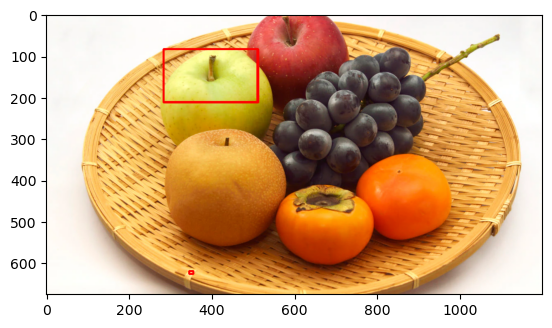

In [11]:
for each_contour in contours:
    # 輪郭に外接する長方形を取得する
    x, y, w, h = cv2.boundingRect(each_contour)
    # 長方形を描画する
    img1_rect = cv2.rectangle(img_fruit_rgb, (x, y), (x+w, y+h), (255, 0, 0), 3)
plt.imshow(img_fruit_rgb)

# 3.	cv2.RETR_EXTERNAL, cv2.RETR_LIST, cv2.RETR_TREE, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE について調べる

# cv2.RETR_EXTERNALは最も外側の輪郭のみ抽出し、それらに階層構造を与えない.cv2.RETR_LISTは検出した全ての輪郭に階層構造を与えない。cv2.RETR_TREEは検出した全ての輪郭に完全な階層構造を与える。cv2.RETR_CCOMPは検出した全ての輪郭に2階層構造を与える。cv2.CHAIN_APPROX_SIMPLEは水平・垂直・斜めの成分を圧縮して端点として格納

# 4.	cv2.inRange関数を自分作ってみる

Text(0.5, 1.0, 'cv2.inRange')

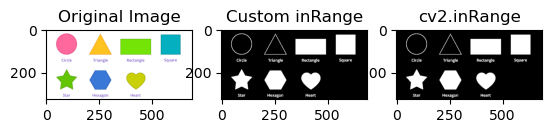

In [50]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def inRange(image, lower_bound, upper_bound):
    height, width = image.shape[:2]
    output = np.zeros((height, width), dtype=np.uint8)
    for y in range(height):
        for x in range(width):
            pixel = image[y, x]
            if (lower_bound <= pixel).all() and (pixel <= upper_bound).all():
                output[y, x] = 255
    return output

image_path = ("C:\\Users\\smart25\\Desktop\\img\\img\\different_shapes.png")

image = cv2.imread(image_path)

lower_bound = np.array([0, 0, 0])  
upper_bound = np.array([250, 250, 250])  

output_custom = inRange(image, lower_bound, upper_bound)

output_cv2 = cv2.inRange(image, lower_bound, upper_bound)

plt.subplot(131)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(132)
plt.imshow(output_custom, cmap='gray')
plt.title('Custom inRange')

plt.subplot(133)
plt.imshow(output_cv2, cmap='gray')
plt.title('cv2.inRange')
